Exercise 1: The basics of image processing
=======================

To complete the exercise, follow the instructions and complete the missing code and write the answers where required.  All points, except the ones marked with **(N points)** are mandatory. The optional tasks require more independent work and some extra effort. Without completing them you can get at most 75 points for the exercise (the total number of points is 100 and results in grade 10). Sometimes there are more optional exercises and you do not have to complete all of them, you can get at most 100 points.

If you have not used Python, IPython and Jupyter environment before, take a look at the following list introductory tutorials:

 * [Introduction to Python 3](https://realpython.com/python-introduction/)
 * [Useful IPython facts](https://ipython.org/ipython-doc/3/interactive/tutorial.html)
 * [Introduction to Jupyter notebooks](https://www.dataquest.io/blog/jupyter-notebook-tutorial/)
 * [Introduction to NumPy, SciKit, MatPlotLib](https://cs231n.github.io/python-numpy-tutorial/)


In [87]:
# First, run this cell to download the data used in this exercise
import zipfile, urllib.request, io
zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("http://data.vicos.si/lukacu/multimedia/exercise1.zip").read())).extractall()

Assignment 1: Image processing, histograms, filters
----------

The aim of this assignment is to familiarize yourself with the basic functionality of SciKit, NumPy and MatPlotLib, as well as the use of matrices for storing image information. In this assignment, you will try to load an image, display it and manipulate its content with NumPy operations.

 * Read image from the file `umbrellas.jpg`, and display it using functions skimage.io.imshow. The image that you have loaded consists of three channels (Red, Green, and Blue), and is represented as a 3-D matrix with dimensions height × width × channels.

<IPython.core.display.Javascript object>


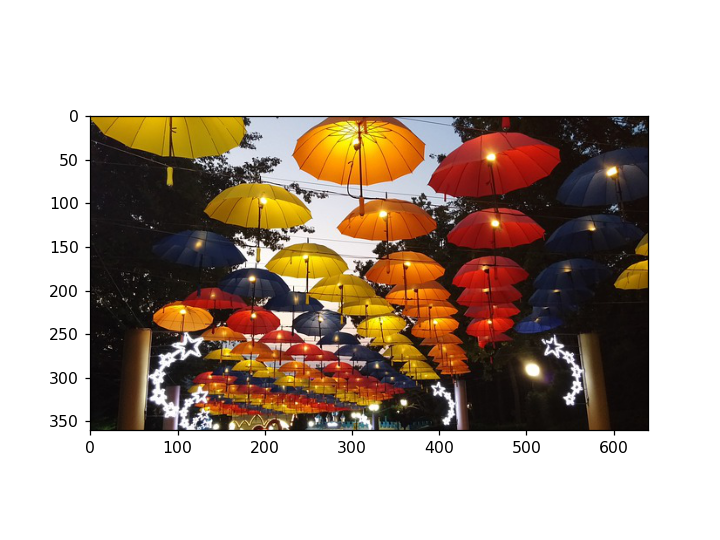

In [88]:
# Use this IPython command to enable interactive plots (without it they will be rendered only as static images)
%matplotlib notebook

# We will be using SciKit-Image library for image IO and image processing and MatPlotLib 
# for visualization in the notebook.
from skimage import data, io
from matplotlib import pyplot as plt

image = io.imread("umbrellas.jpg")
plt.imshow(image) # Draw the image
plt.show() # Display the image

 * You can query the dimensions of the matrix using the property `shape`. Observe that a color image has three layers (third dimension), while a grayscale image has only one layer and is also missing the third dimension. Also check the dtype of the matrix, by default images are presented using uint8 type (unsigned integers in range 0 to 255).

In [89]:
from skimage import data, io

print(image.shape)

gray = io.imread("phone.jpg")
print(gray.shape)

print(image.dtype)

(360, 640, 3)
(384, 510)
uint8


 * Convert the color image into a grayscale one by averaging all three channels. Be careful when visualizing single channel images as they are not always visualized as grayscale. It is important to correctly set the colormap of the plot.

float64


<IPython.core.display.Javascript object>


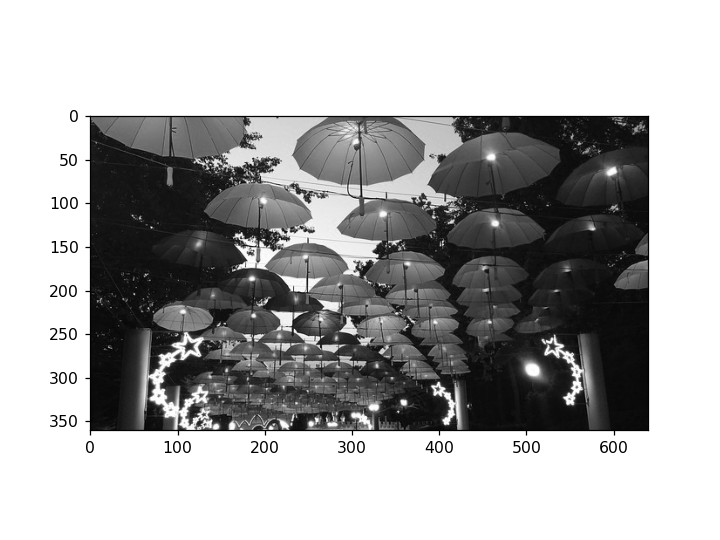

<IPython.core.display.Javascript object>


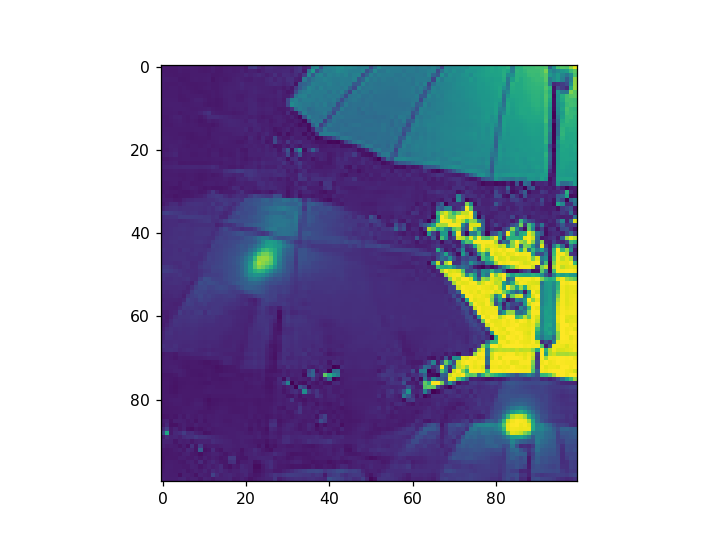

In [90]:
# We will be using numpy library for low-level matrix operations.
import numpy as np

gray = np.mean(image, 2) # Function numpy.mean converts image to float64
print(gray.dtype) # Display the data type of matrix

plt.figure()
plt.imshow(gray.astype(np.uint8), cmap = plt.cm.gray) # If we want to display image correctly we have to cast it to uint8 again.
plt.show()

plt.figure()
plt.imshow(gray.astype(np.uint8), cmap = plt.cm.jet) # Change colormap to interpret values differently.
plt.show()

 * Cut out a rectangular sub-image, and display it as a new image. Mark the same region in the original image by setting its third (the blue) color channel to 0, and display the modified image.

<IPython.core.display.Javascript object>


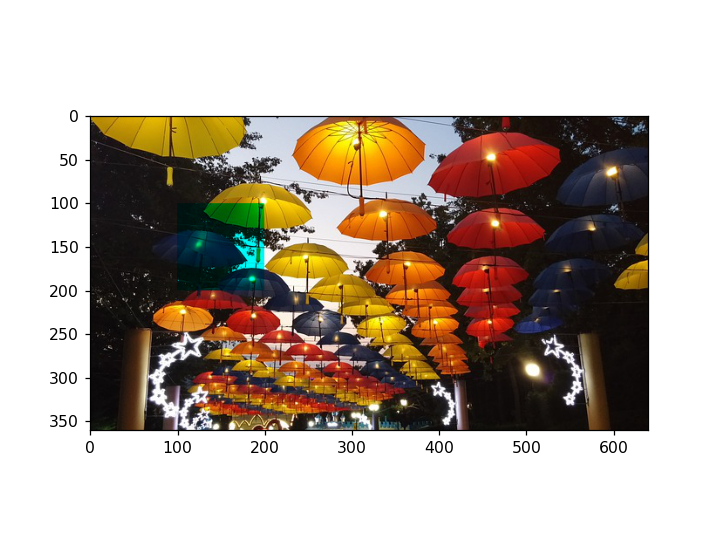

In [91]:
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np

image = io.imread("umbrellas.jpg")

cutout = image[100:200, 100:200, 1]
plt.imshow(cutout)
plt.show()

# set a part of the image to 0 using range-indexing notation.
cutout2 = np.copy(image) # copy image
cutout2[100:200, 100:200, 0] = 0 # set red color channel to 0 (da se bolje vidi; za modro namesto 0 -> 2)

plt.figure()
plt.imshow(cutout2)
plt.show()

 * Display a grayscale image that has the selected region negated (its values are inverted).

<IPython.core.display.Javascript object>


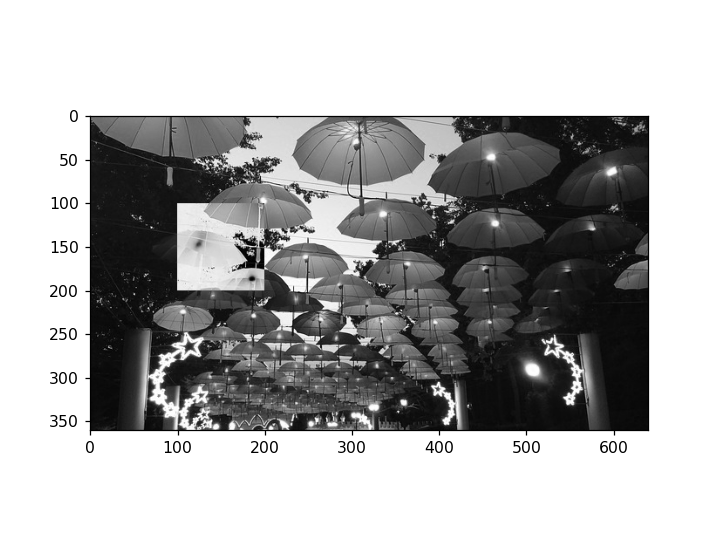

In [92]:
# use the same region as before. You can use matrix-scalar operations to achieve negation (255 - A).

def invert(image):
    region = image[100:200, 100:200]
    region = (255 - region)
    image[100:200, 100:200] = region
    
    plt.figure()
    plt.imshow(image)
    plt.imshow(gray.astype(np.uint8), cmap = plt.cm.gray)
    plt.show()

slika = io.imread("umbrellas.jpg")

# naredimo grayscale image
gray = np.mean(slika, 2) # Function numpy.mean converts image to float64

invert(gray)

 * Compute and display a thresholded binary image. Thresholding is an image operation that produces a binary image (mask) of the same size as the source image; its values are 1 (true) and 0 (false), depending on whether the corresponding pixels in the source image have values greater or lower than the specified threshold. Use a threshold of 150, and display the resulting image. Experiment with different thresholds and write down your observations.

<IPython.core.display.Javascript object>


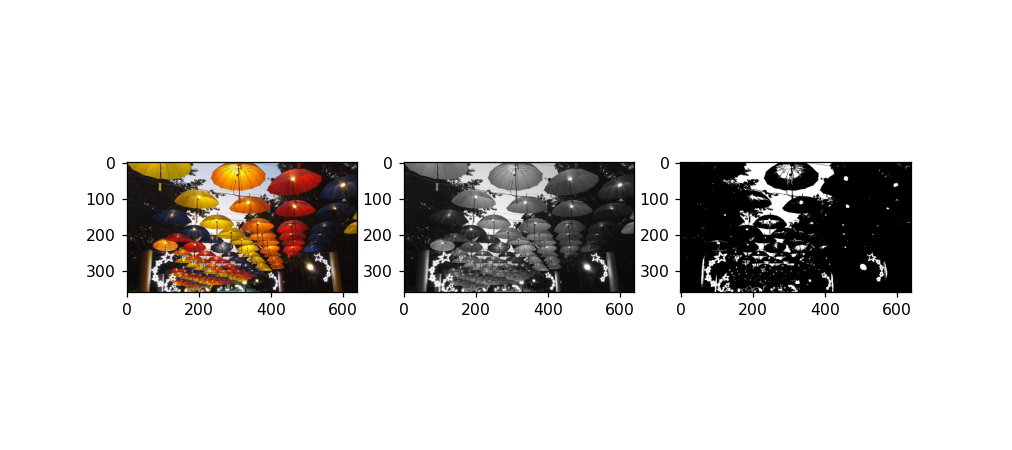

<IPython.core.display.Javascript object>


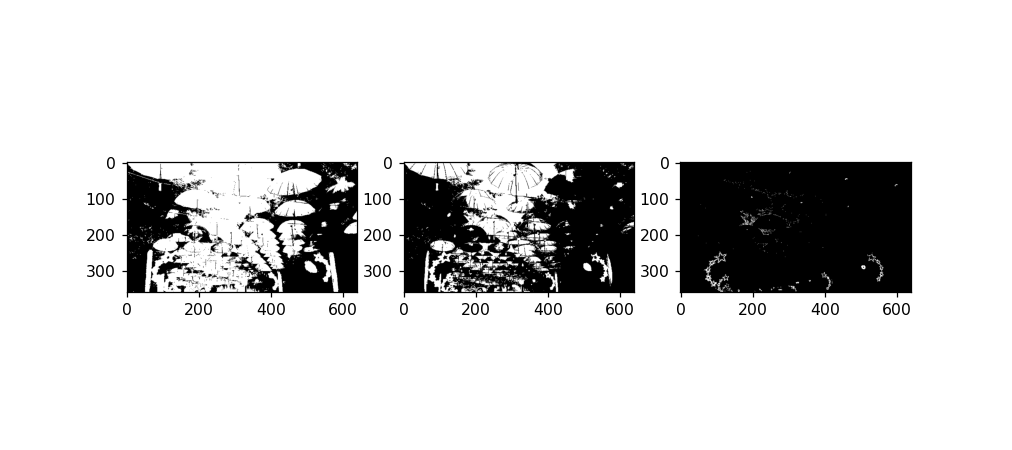

In [93]:
import numpy as np

image = io.imread("umbrellas.jpg")

gray = np.mean(image, 2)

_, ax = plt.subplots(1, 3, figsize=(9, 4)) # Divide plot into a grid of axes, use each handle to draw on subplot

ax[0].imshow(image)
ax[1].imshow(gray, cmap=plt.cm.gray)

thresholded = gray > 150
ax[2].imshow(thresholded, cmap=plt.cm.gray)
plt.show()

# Observation: 
# if the pixel value is smaller than the threshold, it is set to 0
# otherwise, it is set to a maximum value - usually 255
#zero is black, 255 is white

# Experimenting
_, ax_new = plt.subplots(1, 3, figsize=(9, 4))

# slika je precej svetla - sklep: veliko pikslov nad vrednostjo 50
thresholded = gray > 50
ax_new[0].imshow(thresholded, cmap=plt.cm.gray)
plt.show()

thresholded = gray > 100
ax_new[1].imshow(thresholded, cmap=plt.cm.gray)
plt.show()

# slika je zelo temna - sklep: ni veliko pikslov z vrednostmi nad 200
thresholded = gray > 250
ax_new[2].imshow(thresholded, cmap=plt.cm.gray)
plt.show()

Now we will take a look at the construction of histograms. Histograms are a very useful tool in image analysis; as we will be using them extensively in the later exercises, it is recommended that you pay extra attention to how they are built. In this assignment, we will focus on the construction of histograms for single-channel (grayscale) images. We will use function `skimage.exposure.histogram` which has some useful modes. Check the documentation for arguments `nbins`, `source_range` and `normalize` and write down their function. What is the meaning of variables returned by the function?

The second part of the assignment expects you to try out several image filtering approaches, this is another useful basic technique that is used frequenlty in our next assignments.

In [94]:
from skimage.exposure import histogram

image = np.mean(io.imread("umbrellas.jpg"), 2).astype(np.uint8)
hvalues, hbins = histogram(image, nbins=256, source_range='dtype', normalize=False)

print(hvalues)
print(hbins)

# nbins: int, optional
# Number of bins used to calculate histogram. This value is ignored for integer arrays.

# source_range: string, optional
# ‘image’ (default) determines the range from the input image. 
# ‘dtype’ determines the range from the expected range of the images of that data type.

# normalize: bool, optional
# If True, normalize the histogram by the sum of its values.

[  15   70   84  104  111  137  189  294  465 1202 2708 4037 5511 5656
 5162 4824 4833 4899 4792 5062 5234 4921 4393 3776 3197 2800 2424 2189
 2006 1891 1841 1696 1673 1648 1554 1591 1635 1467 1416 1374 1271 1178
 1229 1115 1060 1050 1025 1009 1008 1010 1048  978  998 1080 1081 1143
 1154 1218 1201 1305 1246 1265 1201 1144 1169 1178 1209 1236 1187 1140
 1118 1069 1117 1079 1036 1090 1017  998 1046 1098 1007 1016 1020  981
  960  955  957  963  963  914  924  835  874  908  835  863  875  853
  868  880  914  930  966  961  994 1088 1110 1055 1166 1168 1171 1082
 1064 1070 1023  984  995  909  946  893  854  793  812  791  777  805
  762  757  748  729  706  692  675  640  666  594  541  536  514  466
  492  495  417  417  381  382  377  357  337  292  289  283  307  272
  272  260  255  242  258  230  251  226  227  207  206  220  193  171
  174  172  155  156  151  138  172  136  142  134  140  164  110  138
  124  122  115  153  138  152  133  169  191  234  230  249  294  315
  464 

 * Compute histogram for more than one image of your choice and visualize the results using `matplotlib.pyplot.bar`.

<IPython.core.display.Javascript object>


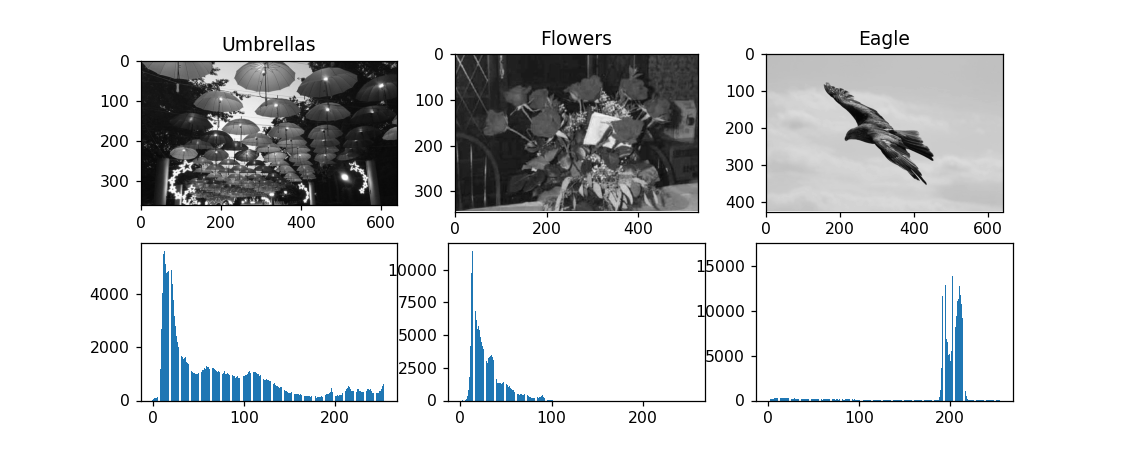

In [95]:
_, ax = plt.subplots(2, 3, figsize=(10, 4))

ax[0, 0].set_title("Umbrellas")
ax[0, 0].imshow(image, cmap = plt.cm.gray)
ax[1, 0].bar(hbins, hvalues) # Use this function to draw a bar graph
plt.show()

# TODO: add at least two more images and their histograms to the left of the figure.
flowers = np.mean(io.imread("flowers.jpg"), 2).astype(np.uint8)
hvalues_flowers, hbins_flowers = histogram(flowers, nbins=256, source_range='dtype', normalize=False)

ax[0, 1].set_title("Flowers")
ax[0, 1].imshow(flowers, cmap = plt.cm.gray)
ax[1, 1].bar(hbins_flowers, hvalues_flowers) # Use this function to draw a bar graph
plt.show()

#############################################################################################################################

eagle = np.mean(io.imread("eagle.jpg"), 2).astype(np.uint8)
hvalues_eagle, hbins_eagle = histogram(eagle, nbins=256, source_range='dtype', normalize=False)

ax[0, 2].set_title("Eagle")
ax[0, 2].imshow(eagle, cmap = plt.cm.gray)
ax[1, 2].bar(hbins_eagle, hvalues_eagle) # Use this function to draw a bar graph
plt.show()

# vmin=0, vmax=255

 * For this task, you will implement a simple image operation called *histogram stretching*. Using the pseudo-code provided below, implement the function `histstretch`, which performs the histogram stretching on the input grayscale image. For the outline of the algorithm, consult the slides from the lectures. As we are performing the same operation (with the same factors) on all image elements, the operation can be sped-up via use of matrix operations, which perform the operation on the whole image at once. Do not use any existing function to simplify your work, this assignment should test your skills a bit.
 
   Hints: The maximum and the minimum grayscale value in the input image, can be determined using functions `np.max` and `np.min`.
   
   Test the function by writing a script that reads an image from file `phone.jpg` (note that it is already a grayscale image), compute the histogram with 256 bins, and displays it. As you can observe from the histogram, the lowest grayscale value in the image is not 0, and the highest value is not 255. Perform the histogram stretching operation and visualize the results (display the image and plot its 256-bin histogram).

<IPython.core.display.Javascript object>


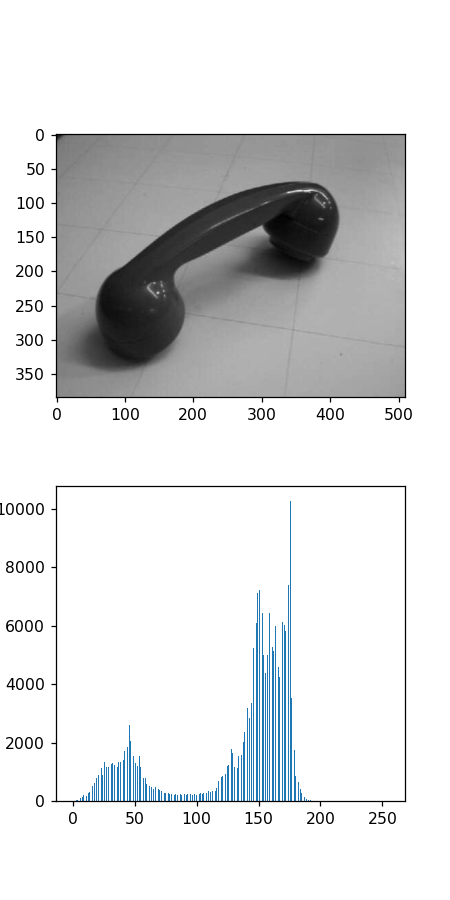

In [96]:
def histstretch(image):
    # 1. determine the minimum and maximum value of I
    low = np.min(image)
    high = np.max(image)
    
    # 2. the minimum and maximum of the output image S are known
    min = 0
    max = 255
    
    # 3. use the stretch formula to compute new value for each pixel
    image = min + (image - low) * ((max - min) / (high - low))
    
    return image
    
# TODO: write a code to test your function
phone = io.imread("phone.jpg")

new_phone = histstretch(phone)

hvalues_phone, hbins_phone = histogram(new_phone.astype(np.uint8), nbins=256, source_range='dtype', normalize=False)

_, ax_phone = plt.subplots(2, 1, figsize=(4, 8))

ax_phone[0].imshow(new_phone, cmap = plt.cm.gray)
ax_phone[1].bar(hbins_phone, hvalues_phone) # Use this function to draw a bar graph
plt.show()

 * **(5 points)** How would you use the different color spaces to perform the histogram stretching operation to improve the contrast, but without distorting the colors? Find a color image with weak contrast and write a script that demonstrates your solution on it. Use existing hisotgram equalization in `skimage.exposure.equalize_hist` to improve single-channel image, but note that the function only works correctly on grayscale images, so an extra step is required to achieve correct adjustment. Use the `flowers.jpg` image for testing.

<IPython.core.display.Javascript object>


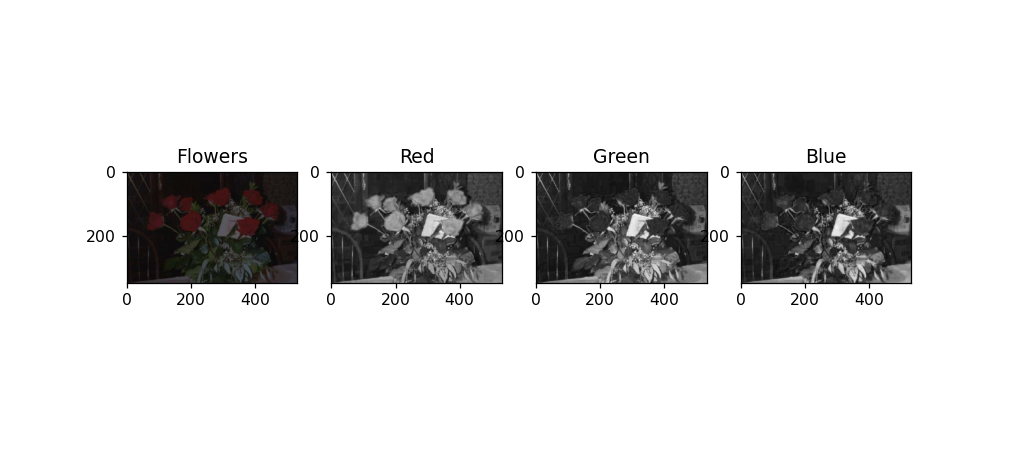

In [97]:
from skimage.exposure import histogram

flowers = io.imread("flowers.jpg")

_, ax = plt.subplots(1, 4, figsize=(9, 4))

ax[0].set_title("Flowers")
ax[0].imshow(flowers)
ax[1].set_title("Red")
ax[1].imshow(flowers[:, :, 0], cmap = plt.cm.gray)
ax[2].set_title("Green")
ax[2].imshow(flowers[:, :, 1], cmap = plt.cm.gray)
ax[3].set_title("Blue")
ax[3].imshow(flowers[:, :, 2], cmap = plt.cm.gray)

plt.show()

 * Now lets look at linear filtering operations. We will not implement them, instead we will simply test the effects of some common operations on images. Write a script that loads images `umbrellas.jpg` and `trucks.jpg`, converts them to grayscale and filters them using Gaussian filter, Sobel filter, and Median filter. You can find implementations of all three filters in the `skimage.filters` module. Visualize the results for default parameter values. Which of the three are linear filters? What effect does `sigma` parameter have for Gaussian filter?

<IPython.core.display.Javascript object>


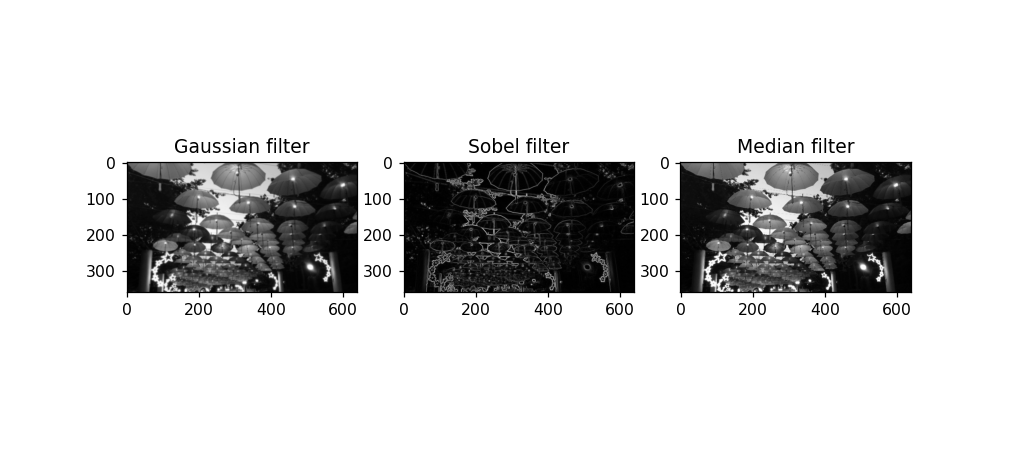

<IPython.core.display.Javascript object>


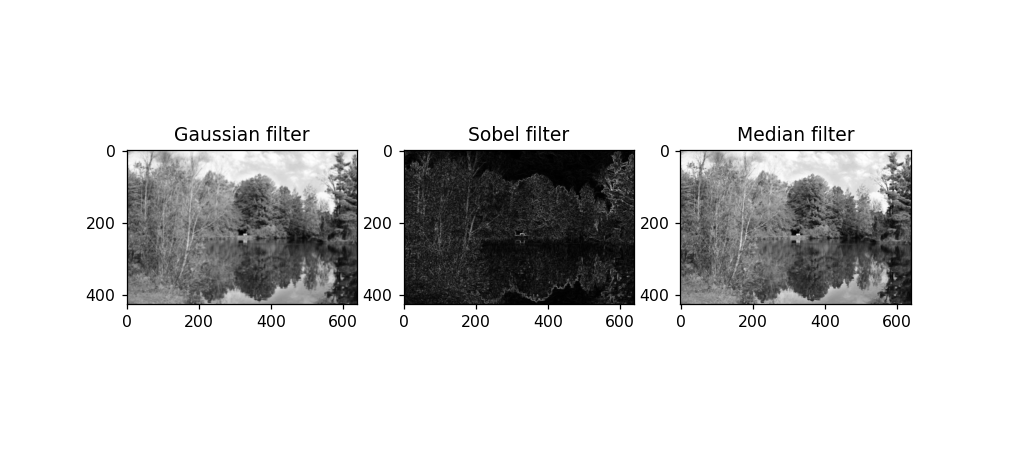

In [98]:
from skimage.filters import *

umbrellas = np.mean(io.imread("umbrellas.jpg"), 2)

_, ax = plt.subplots(1, 3, figsize=(9, 4))

ax[0].set_title("Gaussian filter")
ax[0].imshow(gaussian(umbrellas, multichannel=False), cmap = plt.cm.gray) 
# Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. 
# use `multichannel=False` to interpret as 3D image with last dimension of length 3.
ax[1].set_title("Sobel filter")
ax[1].imshow(sobel(umbrellas), cmap = plt.cm.gray)
ax[2].set_title("Median filter")
ax[2].imshow(median(umbrellas), cmap = plt.cm.gray)

autumn = np.mean(io.imread("autumn1.jpg"), 2)

_, ax = plt.subplots(1, 3, figsize=(9, 4))

ax[0].set_title("Gaussian filter")
ax[0].imshow(gaussian(autumn, multichannel=False), cmap = plt.cm.gray) 
ax[1].set_title("Sobel filter")
ax[1].imshow(sobel(autumn), cmap = plt.cm.gray)
ax[2].set_title("Median filter")
ax[2].imshow(median(autumn), cmap = plt.cm.gray)

plt.show()

 * (**5 points**) Implement image sharpening as a combination of blurring and pixel-wise operations as it was described at the lectures. How can you control the impact of the sharpening on the input image? To complete the task you have to understand the underlying principle, not just show the implementation.

<IPython.core.display.Javascript object>


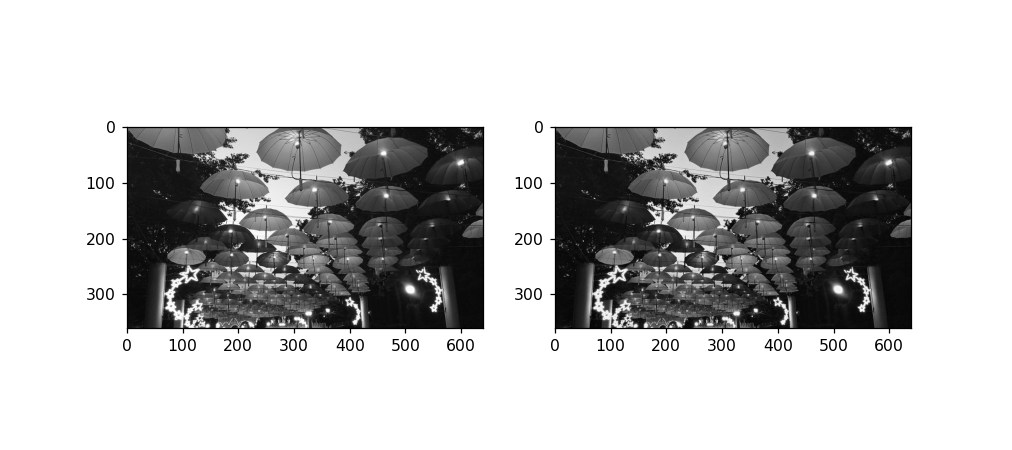

In [99]:
# how can you control the impact of the sharpening on the input image?
import skimage as sk

def sharpen(image):
    u = 0.1
    
    original = sk.img_as_float(image)
    blured = gaussian(original, multichannel=False, sigma=10) # sigma = bluring intensity
    minus = (1 - u) * original + u * (original - blured)
    
    res = np.clip(minus, a_min=0, a_max=1)
    res = sk.img_as_ubyte(res)
    
    return res
    

umbrellas = np.mean(io.imread("umbrellas.jpg"), 2).astype(np.uint8)

_, ax = plt.subplots(1, 2, figsize=(9, 4))

ax[0].imshow(umbrellas, cmap = plt.cm.gray)
ax[1].imshow(sharpen(umbrellas), cmap = plt.cm.gray)
plt.show()

Assignment 2: Geometric transformations
-----
    
A homography is a bijective transformation between two projection spaces, in our case planes; the first plane is the source image plane, while the second plane is defined by input points that denote an area in which we wish to embed the source image. A homography  s described by a matrix; in case of transformation between two planes, it has dimension
3 × 3.

 * Write a script in which you read and display the image from file `monitor.jpg`, and determine a polygon of four points. It is recommended that you pick the four points that correspond to the corners of the monitor in the image. Determine a suitable order of points (for example, begin at top-right corner and continue in counter-clockwise direction). Afterwards, display a polygon that is defined by the selected points (e.g. set the pixels within the polygon to white as shown in the example below). 

<IPython.core.display.Javascript object>


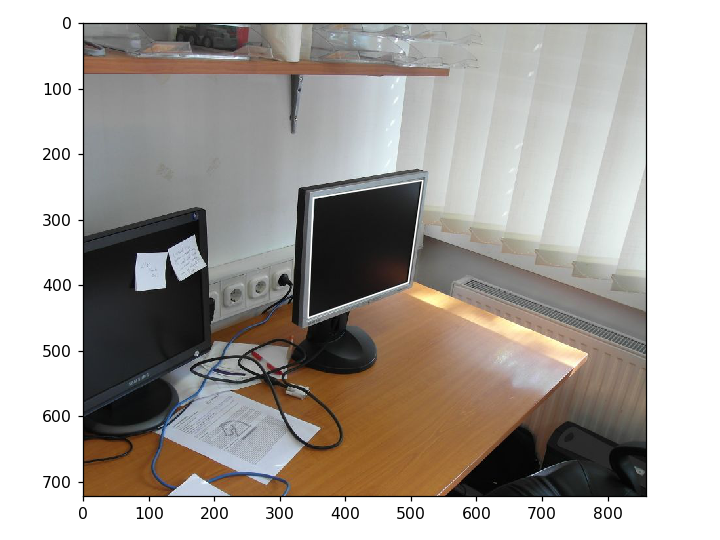

<IPython.core.display.Javascript object>


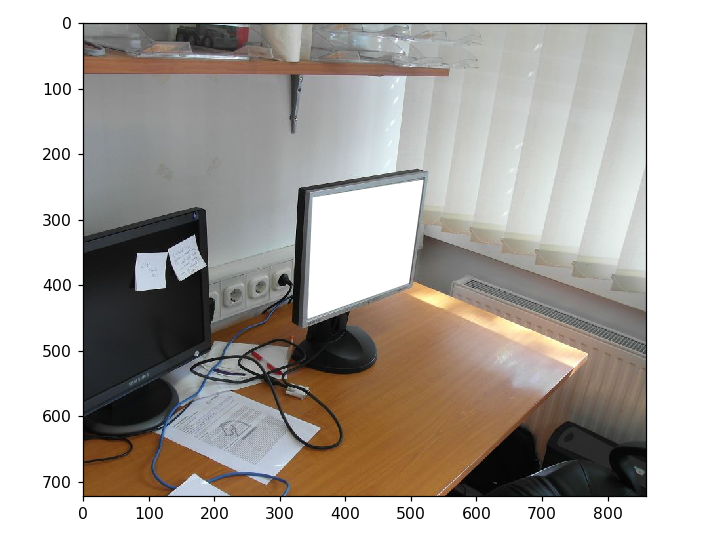

In [100]:
image = io.imread("monitor.jpg")

p2 = [(518, 240), (351, 267), (343, 450), (496, 396)] # Changed destination point coordinates (koordinate robov monitorja)

fig = plt.figure()
io.imshow(image)

xs, ys = zip(*p2) # Convert points to vertices of x and y coordinates (handy function in Python)
plt.fill(xs, ys, edgecolor='w', fill=False) # samo obroba
plt.show()

fig = plt.figure()
io.imshow(image)

plt.fill(xs, ys, color='w', fill=True) # pobarvamo poligon
plt.show()

def onclick(event):
    value = str(event)  # Dynamically update the text box above
    print(value)

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

 * Create a script that reads an image and uses the its dimensions and the selected points to compute the homography, using the function estimate_homography. This function returns the homography matrix H, which can be used to transform pixel-coordinates from the source image plane using the following formula:
\begin{equation}
\label{eq:homography1}
p^\prime_b = \mathbf{H}_{ab}p_a \,
\end{equation}
with the following individual parts of the equation:
\begin{equation}
\label{eq:homography2}
p_a = \begin{bmatrix} x_a\\y_a\\1\end{bmatrix}, p^\prime_b = \begin{bmatrix} w^{\prime}x_b\\w^{\prime}y_{b}\\w^{\prime}\end{bmatrix}, \mathbf{H}_{ab} = \begin{bmatrix} h_{11}&h_{12}&h_{13}\\h_{21}&h_{22}&h_{23}\\h_{31}&h_{32}&h_{33} \end{bmatrix}.
\end{equation}

In [101]:
def estimate_homography(p1, p2):
    A = np.zeros((8,9))
    # Homography matrix
    for i in range(4): # Using the corners
            A[i*2,:] = [ p1[i][0], p1[i][1], 1, 0, 0, 0, -p2[i][0]*p1[i][0], -p2[i][0]*p1[i][1], -p2[i][0] ]
            A[i*2+1,:] = [0, 0, 0, p1[i][0], p1[i][1], 1, -p2[i][1]*p1[i][0], -p2[i][1]*p1[i][1], -p2[i][1] ]

    [U,S,V] = np.linalg.svd(A)
    return np.reshape(V[-1,:],(3,3))

p1 = [(0, 0), (100, 0), (100, 100), (0, 100)] # Some dummy source points

H = estimate_homography(p1, p2)

print(H)

[[ 4.01509349e-03 -4.90154547e-04 -9.07328986e-01]
 [ 3.56153021e-04 -3.43148975e-03 -4.20384086e-01]
 [ 3.10518771e-06 -1.76513433e-06 -1.75160036e-03]]


 * As can be seen from equations above, the resulting point $p^\prime_b$ is in homogenous form, i.e. before we can use its coordinates, they need to be divided by $w^{\prime}$. Homography equation allows you to transform the coordinates of each pixel from the original image to its destination coordinates in the target image. Replace the pixels in the target image with the corresponding pixels from your source image.


[(518, 240), (351, 267), (343, 450), (496, 396)]


<IPython.core.display.Javascript object>


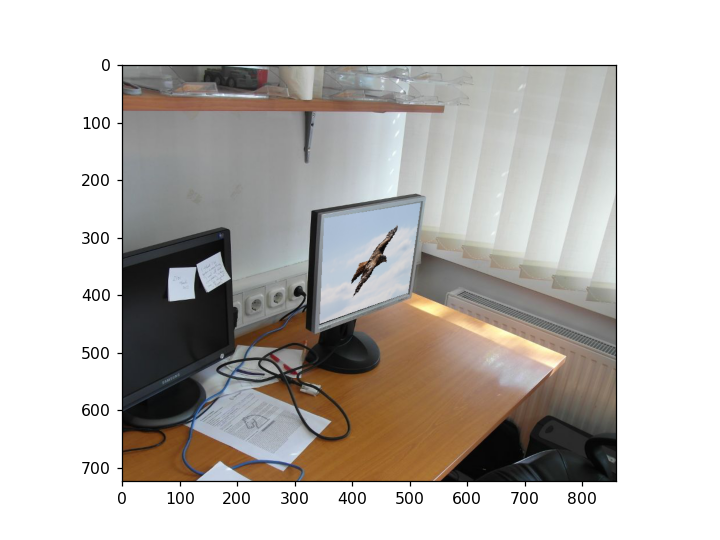

In [102]:
destination = io.imread("monitor.jpg")
source = io.imread("eagle.jpg")

p1 = [(0, 0), (source.shape[1], 0), (source.shape[1], source.shape[0]), (0, source.shape[0])]
print(p2)
H = estimate_homography(p1, p2)

# * Iterate over the source image and map every source pixel to destination one:
#   * Generate its homogeneous coordinate and project it using matrix H
#   * Obtain coordinates in the destination image by normalizing x an y with w and rounding
#   * Copy values from source to destination (be careful about the out-of-image coordinates)
# * Display the resulting image

# TODO: write the wrapping algorithm and a testing script
for i in range(source.shape[0]):
    for j in range(source.shape[1]):
        coordinate = np.array([[j], [i], [1]]) # homogeneous coordinate for current i and j
        project_coordinate = np.dot(H, coordinate) # project coordinate using matrix H
        
        x = int(project_coordinate[0] / project_coordinate[2]) # coordinates in the destination image
        y = int(project_coordinate[1] / project_coordinate[2])
        
        if x > 0 and y > 0 and x < destination.shape[1] and y < destination.shape[0]: #check for out-of image coordinates
            destination[y, x, :] = source[i, j , :] # mapping

plt.figure()
plt.imshow(destination)
plt.show()

 * **(5 points)** What is the problem with the pixel mapping approach that we have used in the previous task? Write a better pixel mapping that you have discussed at the lectures that will not have the same problems. Test the base and improved approaches by using the following reference points: `p1 = [(50, 50), (400, 50), (600, 600), (40, 400)]`. Note that increasing the resolution of the source image before projection is not a valid solution.

<IPython.core.display.Javascript object>


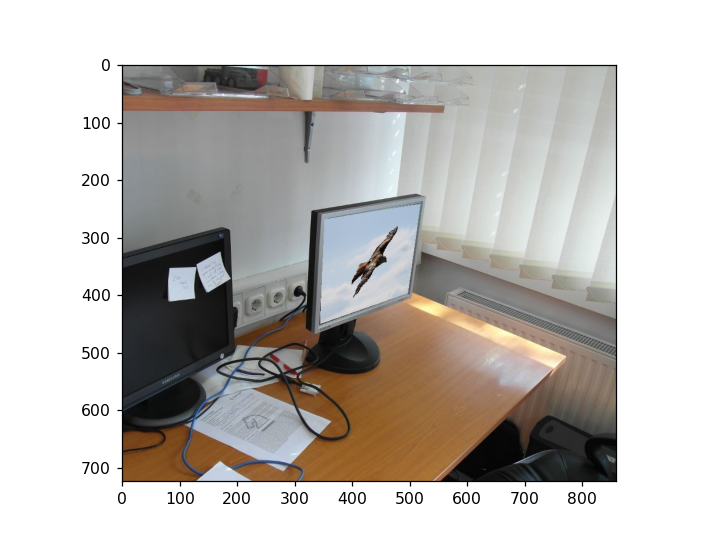

In [103]:
# What is the problem with the pixel mapping approach that we have used in the previous task?
# The problem is, that a single pixel in the first image is mapped to more (or none) pixels in the second image
# we should use inverse mapping approach

# implementation
from numpy.linalg import inv

destination = io.imread("monitor.jpg")
source = io.imread("eagle.jpg")

# ce uporabimo koordinate iz navodil sliko vrze kar nekam
#p1 = [(50, 50), (400, 50), (600, 600), (40, 400)]
p1 = [(0, 0), (source.shape[1], 0), (source.shape[1], source.shape[0]), (0, source.shape[0])]

#p2 = [(518, 240), (351, 267), (343, 450), (496, 396)]

H = estimate_homography(p1, p2)
H_inverse = inv(H)

for i in range(destination.shape[0]):
    for j in range(destination.shape[1]):
        coordinate = np.array([[j], [i], [1]]) # homogeneous coordinate for current i and j
        project_coordinate = np.dot(H_inverse, coordinate) # project coordinate using matrix H invese
        
        x = int(project_coordinate[0] / project_coordinate[2]) # coordinates in the destination image
        y = int(project_coordinate[1] / project_coordinate[2])
        
        if x > 0 and y > 0 and x < source.shape[1] and y < source.shape[0]: #check for out-of image coordinates
            destination[i, j, :] = source[y, x , :] # mapping

plt.figure()
plt.imshow(destination)
plt.show()

 * **(5 points)** You have probably implemented mapping as a double for-loop in Python. To practice matrix operations, try implementing the entire process (forward or backward projection) without explicit for-loops.

<IPython.core.display.Javascript object>


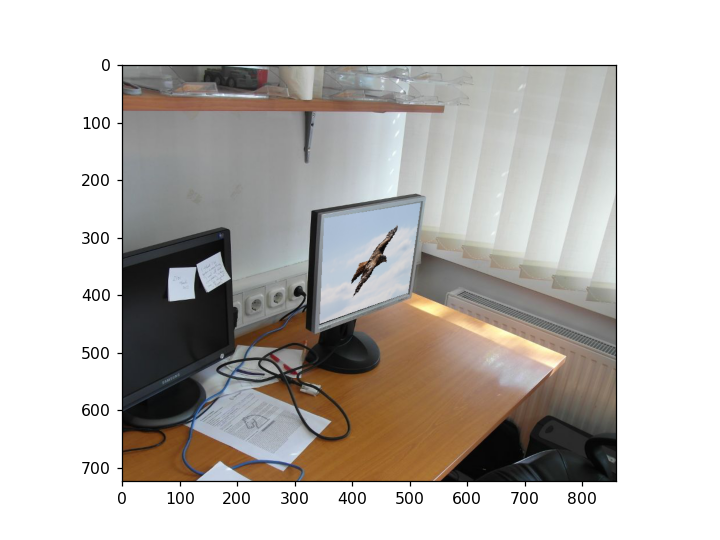

In [104]:
import numpy as np
from numpy.linalg import inv

destination = io.imread("monitor.jpg")
source = io.imread("eagle.jpg")

p1 = [(0, 0), (source.shape[1], 0), (source.shape[1], source.shape[0]), (0, source.shape[0])]

H = estimate_homography(p1, p2)

# moja for loop-a
i_s = np.arange(0,source.shape[0],1).repeat(source.shape[1]) # [  0   0   0 ... 425 425 425]
j_s = np.tile(np.arange(0,source.shape[1],1 ),source.shape[0]) # [  0   1   2 ... 637 638 639]

coordinates = np.stack((j_s, i_s, np.ones(source.shape[0] * source.shape[1]))) # homogeneous coordinate for current i and j
project_coordinates = np.dot(H, coordinates) # project coordinate using matrix H

x = project_coordinates[0,:]/project_coordinates[2,:]  # coordinates in the destination image
y = project_coordinates[1,:]/project_coordinates[2,:]

x = x.astype(int) # hocemo cela stevila
y = y.astype(int)

# condition for out-of image coordinates: returns an array of true/false
v = np.logical_and(np.logical_and(x > 0, y > 0), np.logical_and(x < destination.shape[1], y < destination.shape[0]))

destination[y, x, :] = source[i_s[v], j_s[v], :] # mapping

plt.figure()
plt.imshow(destination)
plt.show()

Assignment 3: Blending images
----

Another more sophisticated image manipulation technique is image blending. The simplest way to do blending is by combining the two images based on the information from the mask, use the color information from the background image if the mask is `0` and color information from foreground image if the mask is `1`. An extension of this technique uses mask values as weights when summing up two images, in this case the mask is used as the alpha (transparency) mask of the foreground that is blended upon the background image. 

* Implement a function `blend_alpha` that receives two color images and a mask and combines them using equation:

  \begin{equation}
  \mathbf{M}_i = \alpha_i \mathbf{F}_i + (1 - \alpha_i) \mathbf{B}_i,
  \end{equation}

  You can assume that the mask and both images are of the same size. Remember to convert the image data to floating point data type for the calculation and then back to uint8. Test the function by loading image from `eagle.jpg` as foreground image, image from file `underwater.jpg` as background image and mask from file `eagle_mask.png` and visualizes the result. 

<IPython.core.display.Javascript object>


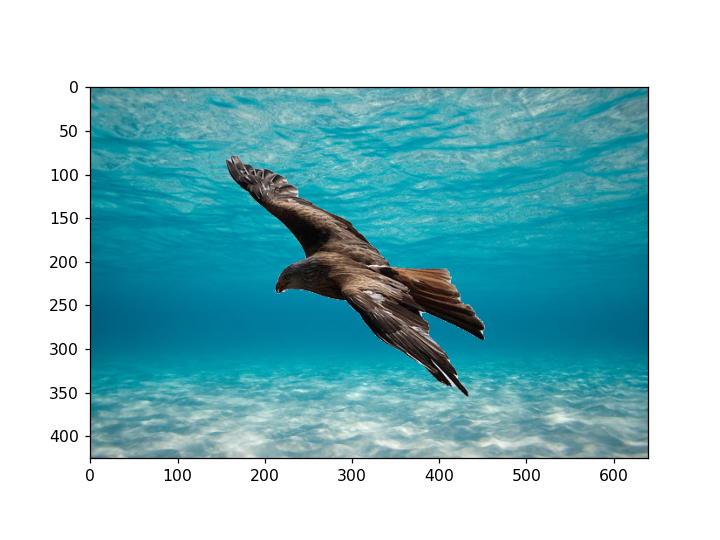

In [156]:
def blend_alpha(F, B, alpha):
    h, w = F.shape[0], F.shape[1]
    blended = np.zeros((h,w,3))
    
    F = sk.img_as_float(F)
    B = sk.img_as_float(B)
    alpha = sk.img_as_float(alpha)
    
    for i in range(h):
        for j in range(w):
            a = alpha[i][j]
            blended[i][j] = a * F[i][j] + (1 - a) * B[i][j]
            
    return blended

#TODO: write a testing script
fore = io.imread("eagle.jpg")
back = io.imread("underwater.jpg")
mask = io.imread("eagle_mask.png")

#call function
blended = blend_alpha(fore, back, mask)

plt.figure()
plt.imshow(blended)
plt.show()

 * As you have heard at the lectures, a more realistic merging can be obtained by taking care of individual frequency bands using a Laplace pyramid. This approach automatically blends higher frequencies in the image with a more precise mask and lower frequencies with a more smoothed mask. For this task you have to first implement function `gaussian_pyramid` to compute an increasingly more blurred image and then proceed to `laplacian_pyramid` that computes the Laplacian pyramid as is explained in the lecture slides. Again, be careful regarding data types, also remember that floating point operations introduce errors so it is a good practice to clip values to a valid interval using `np.clip`. You can use function `skimage.filters.gaussian` to calculate images filtered with a Gaussian (you have to set parameter `preserve_range` to `True`). Test the correctness by visualizing the layers of the pyramid. Experiment with sigma parameter for Gaussian kernel as well as the number of pyramid levels.

/tmp/ipykernel_77/3643455629.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


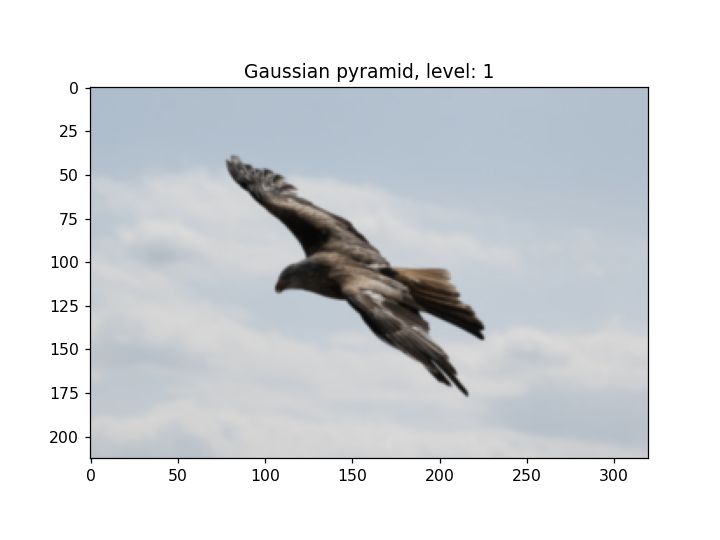

<IPython.core.display.Javascript object>


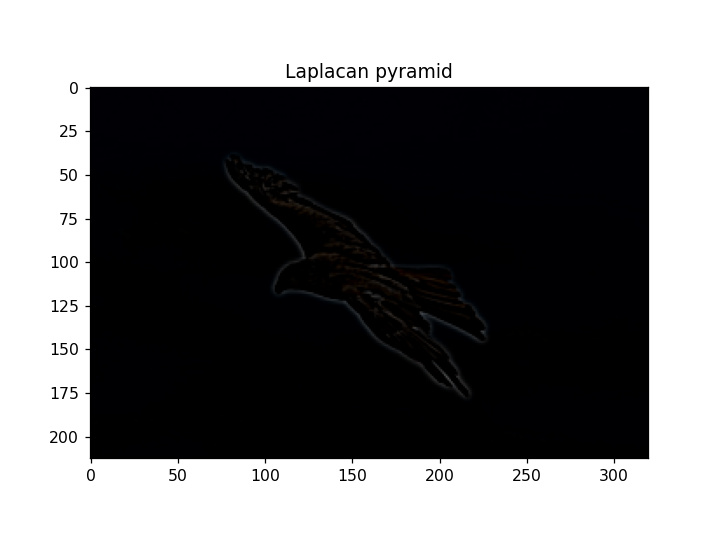

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [172]:
import numpy as np
from skimage import filters
import math

def gaussian_pyramid(I, levels):
    # TODO: write function that generates Gaussian pyramid for a given image
    pyramid = []
    
    iteracija = sk.img_as_float(I)
    pyramid.append(iteracija)
    
    for i in range(levels - 1):
        # smooth with gaussian filter
        smooth = gaussian(iteracija, multichannel=False)
        w, h = smooth.shape[0], smooth.shape[1]
        # new iteration
        iteracija = sk.transform.resize(smooth, (w//2, h//2))
        
        pyramid.append(iteracija)

    return pyramid


def laplacian_pyramid(I, levels):
    # TODO: write function that generates Laplacian pyramid for a given image
    pyramid = []
    
    gauss = gaussian_pyramid(I, levels)
    
    for i in range(levels - 1):
        # vzamemo dve sosednji piramidi
        i1 = gauss[i]
        i2 = sk.transform.resize(gauss[i+1], (i1.shape[0], i1.shape[1])) # resize na isto velikost
        
        substracted = i1-i2
        
        pyramid.append(substracted)
    pyramid.append(gauss[-1])
    return pyramid

# test
gauss_piramida = gaussian_pyramid(io.imread("eagle.jpg"), 3)
plt.figure()
level_show = 1
plt.title("Gaussian pyramid, level: " + str(level_show))
plt.imshow(gauss_piramida[level_show])
plt.show()

laplac_piramida = laplacian_pyramid(io.imread("eagle.jpg"), 3)
plt.figure()
plt.title("Laplacan pyramid")
plt.imshow(laplac_piramida[level_show])
plt.show()

* (**5 points**) Implement a function `blend_laplace` that performs merging using frequency separation. If operating on color images you will have to do this for every channel separately and combine the result. Write a script that tests the function using the same input as before and visualizes the result. Besides image pairs from the previous tasks also test the method on the pair of images `autumn1.jpg` and `autumn2.jpg` together with mask from `autumn_mask.png` and compare how the images are stitched together using Laplace blending in comparison to regular smoothed mask. 

  Finally test also on pair of images `eye.jpg` and `hand.jpg` together with mask from `eye_mask.png`. A reference for the last pair is the image below. 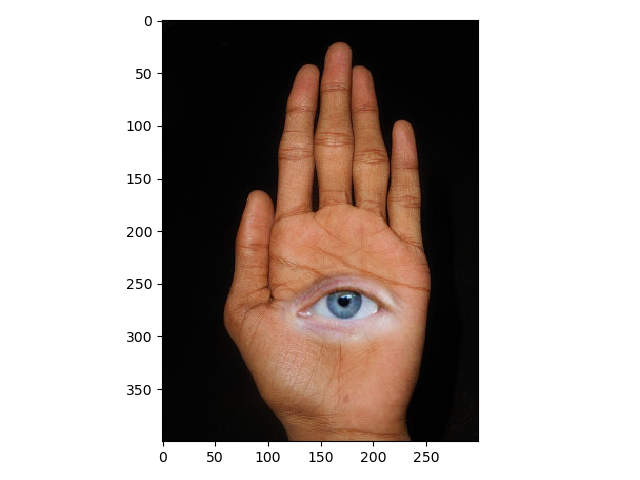

<IPython.core.display.Javascript object>


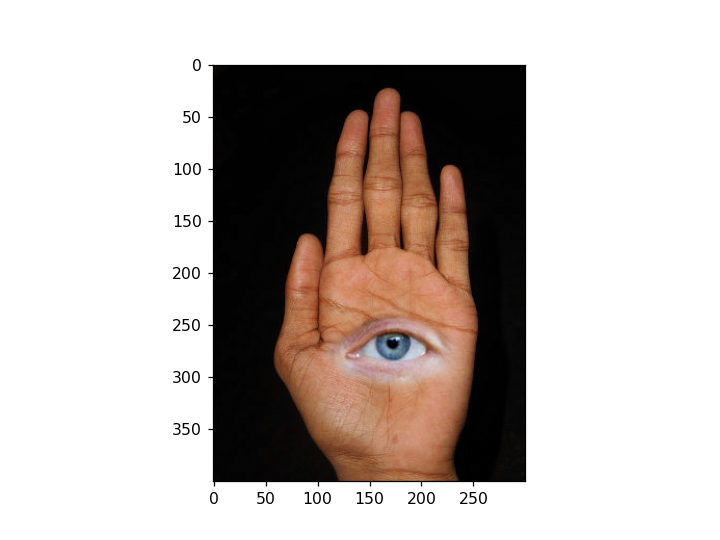

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [168]:
from html import unescape
from typing import final

def flatten_channel(pyramid, levels):
    top = pyramid[0]
    
    for i in range(1, levels):
        size = top.shape
        top += sk.transform.resize(pyramid[i], size)
    return top


def blend_laplace(F, B, alpha):
    levels = 3
    # 1. Compute the Laplace pyramids for background and foreground images.
    laplace_fore = laplacian_pyramid(F, levels)
    laplace_back = laplacian_pyramid(B, levels)
    
    # 2. Compute the Gaussian pyramid for the mask.
    alpha_gauss = gaussian_pyramid(alpha, levels)
    
    # 3. Combine corresponding layers of all three pyramids using weighted averaging (as done in the previous task).
    pyramid = []
    
    for i in range(levels):
        pyramid.append(blend_alpha(laplace_fore[i], laplace_back[i], alpha_gauss[i]))
        
    koncna_slika = flatten_channel(pyramid, levels)
    return koncna_slika

# TODO: use the function
fore = io.imread("eye.jpg")
back = io.imread("hand.jpg")
mask = io.imread("eye_mask.png")

koncna_slika = blend_laplace(fore, back, mask)

# time spent on this: 6+ ur; i hate piramide
plt.figure()
plt.imshow(koncna_slika)
plt.show()